## Introduction:

In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
df = pd.read_csv(r"D:\Datasets\IPL Data.csv")

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
#Data cleaning

col_to_remove = ['mid','date','batsman','bowler','striker','non-striker']
df.drop(labels = col_to_remove, axis =1, inplace = True)

In [5]:
df.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
#To get the information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           75996 non-null  object 
 1   bat_team        76014 non-null  object 
 2   bowl_team       76014 non-null  object 
 3   runs            76014 non-null  int64  
 4   wickets         76014 non-null  int64  
 5   overs           76014 non-null  float64
 6   runs_last_5     76014 non-null  int64  
 7   wickets_last_5  76014 non-null  int64  
 8   total           76014 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 5.2+ MB


In [7]:
#To check null values 
df.isnull().sum()

venue             18
bat_team           0
bowl_team          0
runs               0
wickets            0
overs              0
runs_last_5        0
wickets_last_5     0
total              0
dtype: int64

In [8]:
#To check the playing team 
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
#keeping teams who are consistent
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 
                   'Rajasthan Royals','Mumbai Indians', 
                   'Kings XI Punjab','Royal Challengers Bangalore', 
                   'Delhi Daredevils','Sunrisers Hyderabad']

In [10]:
df = df[(df['bat_team'].isin(consistent_team))&(df['bowl_team'].isin(consistent_team))]

In [11]:
df.head()


,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [12]:
#removing few overs
df = df[df['overs']>=5.0]
df.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [13]:
df['venue'].unique()

array(['M Chinnaswamy Stadium', nan,
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association 

In [14]:
df['venue'].value_counts()

Eden Gardens                                            4497
M Chinnaswamy Stadium                                   4388
Feroz Shah Kotla                                        4265
Wankhede Stadium                                        4259
MA Chidambaram Stadium, Chepauk                         3734
Punjab Cricket Association Stadium, Mohali              2710
Sawai Mansingh Stadium                                  2516
Rajiv Gandhi International Stadium, Uppal               2221
Sardar Patel Stadium, Motera                            1016
Kingsmead                                               1012
Brabourne Stadium                                        933
Punjab Cricket Association IS Bindra Stadium, Mohali     727
SuperSport Park                                          657
Dubai International Cricket Stadium                      649
Himachal Pradesh Cricket Association Stadium             646
Sheikh Zayed Stadium                                     611
Sharjah Cricket Stadium 

In [15]:
new_venue = df['venue'].value_counts()[df['venue'].value_counts()>500].index.tolist()

In [16]:
df = df[df['venue'].isin(new_venue)]

In [17]:
df.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [18]:
df.tail()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
75884,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107
75888,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107


In [19]:
#Feturing engh (to speerate overs and balls)
df['over'] = df['overs'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['overs'].apply(lambda x:str(x).split(".")[1])
df.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,over,ball_no
32,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,5,1
33,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,5,2
34,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,5,3
35,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,5,4
36,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,5,5


In [20]:
df['ball_bowled'] = (df['over'].astype('int')*6)+df['ball_no'].astype('int')
df.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,over,ball_no,ball_bowled
32,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,5,1,31
33,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,5,2,32
34,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,5,3,33
35,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,5,4,34
36,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,5,5,35


In [21]:
df['wickets_left']= 10-df['wickets']
df.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,over,ball_no,ball_bowled,wickets_left
32,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,5,1,31,10
33,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,5,2,32,9
34,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,5,3,33,9
35,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,5,4,34,9
36,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,5,5,35,9


In [22]:
final_df = df.sample(df.shape[0])
final_df

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,over,ball_no,ball_bowled,wickets_left
23798,Eden Gardens,Kolkata Knight Riders,Royal Challengers Bangalore,70,1,9.1,26,1,171,9,1,55,9
42962,Sawai Mansingh Stadium,Sunrisers Hyderabad,Rajasthan Royals,121,8,18.2,37,2,144,18,2,110,2
73298,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Kolkata Knight Riders,172,2,16.3,43,2,209,16,3,99,8
15568,"MA Chidambaram Stadium, Chepauk",Kings XI Punjab,Chennai Super Kings,125,8,19.1,30,4,136,19,1,115,2
663,Sawai Mansingh Stadium,Kings XI Punjab,Rajasthan Royals,73,3,8.3,49,3,166,8,3,51,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47560,Feroz Shah Kotla,Chennai Super Kings,Mumbai Indians,108,1,13.2,51,0,192,13,2,80,9
33888,"MA Chidambaram Stadium, Chepauk",Kings XI Punjab,Chennai Super Kings,70,1,8.3,41,1,156,8,3,51,9
57318,M Chinnaswamy Stadium,Mumbai Indians,Royal Challengers Bangalore,152,2,15.6,53,1,209,15,6,96,8
8783,Kingsmead,Kings XI Punjab,Mumbai Indians,52,3,10.2,28,1,119,10,2,62,7


In [23]:
#from sklearn.model_selection import OneHotEncoder
dummy_df = pd.get_dummies(data = final_df, columns = ['venue', 'bat_team','bowl_team'])
dummy_df.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,over,ball_no,ball_bowled,wickets_left,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
23798,70,1,9.1,26,1,171,9,1,55,9,...,0,0,0,0,0,0,0,0,1,0
42962,121,8,18.2,37,2,144,18,2,110,2,...,0,1,0,0,0,0,0,1,0,0
73298,172,2,16.3,43,2,209,16,3,99,8,...,0,1,0,0,0,1,0,0,0,0
15568,125,8,19.1,30,4,136,19,1,115,2,...,0,0,1,0,0,0,0,0,0,0
663,73,3,8.3,49,3,166,8,3,51,7,...,0,0,0,0,0,0,0,1,0,0


In [24]:
dummy_df.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total',
       'over', 'ball_no', 'ball_bowled', 'wickets_left',
       'venue_Brabourne Stadium', 'venue_Dubai International Cricket Stadium',
       'venue_Eden Gardens', 'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_JSCA International Stadium Complex', 'venue_Kingsmead',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera', 'venue_Sawai Mansingh Stadium',
       'venue_Sharjah Cricket Stadium', 'venue_Sheikh Zayed Stadium',
       'venue_St George's Park', 'venue_SuperSport Park',
       'venue_Wankhede Stadium', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
  

Here our data is ready for generating a model

Now following the following steps

1) Split the data in X and Y (vertical split) 

2) Split the data in training and testing data (Horizontal split)

3) Now import respective libraries for creating model and create a model

4) Fit the training data into the model

5) Get y_pred values using predict()

6) Now calculate the accuracy using respective accuracy method

7) (This is optional step) Plot the graph for data 

8) Built a prediction model on unknown data 

In [25]:
#X= input(features) and y = output(labels)
#Here we took all columns except total runs columns as input

X = dummy_df.drop(columns= ['total'])

#Here we took only total runs columns as output
y = dummy_df['total']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
# Brute Force Modelling method 
# This is iterative process to get the model with highest accuracy rate  
for i in range(25):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.2, random_state= i)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    train_score = regressor.score(X_train, y_train)
    test_score  = regressor.score(X_test, y_test)
    if  test_score > train_score:
        print("Model is fit. Random State {} Test Score {} Train Score {}".format(i,test_score, train_score))
    #else:
        #print("Model is over fitting")

Model is fit. Random State 0 Test Score 0.6783313942124052 Train Score 0.6775571078766967
Model is fit. Random State 6 Test Score 0.6812432519728233 Train Score 0.6768075867832581
Model is fit. Random State 7 Test Score 0.6874080700041763 Train Score 0.6752262766638697
Model is fit. Random State 11 Test Score 0.6892043121200049 Train Score 0.6747271099831512
Model is fit. Random State 12 Test Score 0.6852475858210357 Train Score 0.6757940205281223
Model is fit. Random State 13 Test Score 0.6807543471972326 Train Score 0.6769558453486431
Model is fit. Random State 15 Test Score 0.6779481586039652 Train Score 0.6776465163372194
Model is fit. Random State 17 Test Score 0.6912233124123757 Train Score 0.6742407620514173


In [ ]:
#Once we found the random state with highest accuracy rebuilt the model using that value of random state in 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 15)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
#Find the predicted values 
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = regressor.predict(X_test)

#Find the accuracy score and error using respective methods
print(r2_score(y_test, y_pred)*100)
print(mean_absolute_error(y_test, y_pred))

In [ ]:
#Ploting scatter plot ith best fit line for Linear regression
plt.scatter(y_test, y_pred)
minimum = y_test.min()
maximum = y_test.max()
plt.plot((minimum,maximum),(minimum,maximum),color = 'red' )

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best Fit Line Plot")

plt.show()

In [31]:
dummy_df.head(2)

,runs,wickets,overs,runs_last_5,wickets_last_5,total,over,ball_no,ball_bowled,wickets_left,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
23798,70,1,9.1,26,1,171,9,1,55,9,...,0,0,0,0,0,0,0,0,1,0
42962,121,8,18.2,37,2,144,18,2,110,2,...,0,1,0,0,0,0,0,1,0,0


In [32]:
#prediction based on data 

# Take the no of columns as input, eg: runs = 90 in first place
input_data = (90,3,9.1,43,2,9,2,55,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0)

#convert it into array
input_array = np.asarray(input_data)

#reshape the array into sinlge columns or row
array_reshape = input_array.reshape(1,-1)

#considering the input as X and predicting the ouput
prediction  = regressor.predict(array_reshape)

print(prediction)

[8.45308693e+10]


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 22)
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = DTR.predict(X_test)
print(r2_score(y_test, y_pred)*100)
print(mean_absolute_error(y_test, y_pred))

92.22508151392955
2.5258325339180483


Here we can see accuracy is increased considerebly. Hence we can get accuracy runs

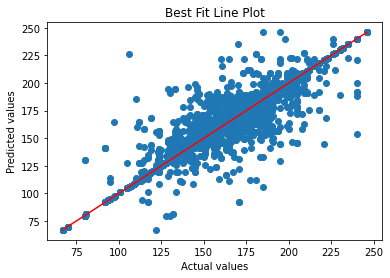

In [36]:
plt.scatter(y_test, y_pred)
minimum = y_test.min()
maximum = y_test.max()
plt.plot((minimum,maximum),(minimum,maximum),color = 'red' )


plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best Fit Line Plot")

plt.show()

In [37]:
#prediction based on data 
input_data = (90,3,9.1,43,2,9,2,55,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0)
input_array = np.asarray(input_data)

array_reshape = input_array.reshape(1,-1)

prediction  = DTR.predict(array_reshape)

print(prediction)

[188.]


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 22)
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = RFR.predict(X_test)
print(r2_score(y_test, y_pred)*100)
print(mean_absolute_error(y_test, y_pred))

96.32060282989858
3.3156611425439033


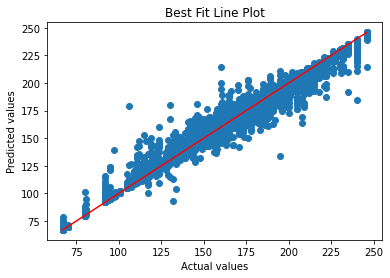

In [41]:
plt.scatter(y_test, y_pred)
minimum = y_test.min()
maximum = y_test.max()
plt.plot((minimum,maximum),(minimum,maximum),color = 'red' )


plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best Fit Line Plot")

plt.show()

In [42]:
#prediction based on data 
input_data = (90,3,9.1,43,2,9,2,55,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0)
input_array = np.asarray(input_data)

array_reshape = input_array.reshape(1,-1)

prediction  = RFR.predict(array_reshape)

print(prediction)

[201.01]


This is the most accurate runs. 
if u crosscheck with actual match the runs made will be near to this amount.